In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 17s - loss: 0.3308 - acc: 0.8979 - val_loss: 0.1231 - val_acc: 

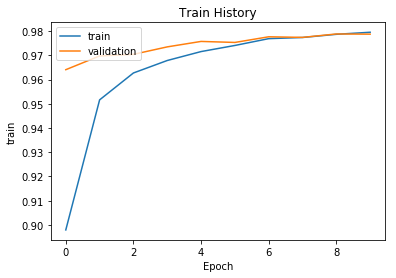

In [2]:
(X_train_images, y_train_labels),(X_test_images, y_test_labels) = mnist.load_data()
X_train = X_train_images.reshape(60000,784).astype('float32')
X_test  = X_test_images.reshape(10000,784).astype('float32')
X_train_normalize = X_train / 255
X_test_normalize  = X_test  / 255
y_train_OneHot = np_utils.to_categorical(y_train_labels)
y_test_OneHot = np_utils.to_categorical(y_test_labels)

model = Sequential()
### 輸入層+layer1
model.add(Dense(units=1000,
                input_dim = 784,
                kernel_initializer = "normal",
                activation = "relu"))
model.add(Dropout(rate = 0.5))
### layer2
model.add(Dense(units=1000,
                kernel_initializer = "normal",
                activation = "relu"))
model.add(Dropout(rate = 0.5))

model.add(Dense(units=10,
                kernel_initializer = "normal",
                activation = "softmax"))
print(model.summary())

model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
history = model.fit(x = X_train_normalize, 
          y = y_train_OneHot, 
          validation_split = 0.2,
          epochs = 10,
          batch_size = 100,
          verbose = 2,
         )

def show_train_history(history,acc,val_acc):
    plt.plot(history.history[acc])
    plt.plot(history.history[val_acc])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
    
show_train_history(history,'acc','val_acc')

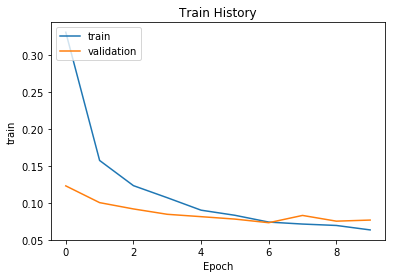

In [3]:
show_train_history(history,'loss','val_loss')

In [4]:
scores = model.evaluate(X_test_normalize, y_test_OneHot)
print("accuracy:",scores[1])

10000/10000 [==============================] - 1s 96us/step
accuracy: 0.9803


In [5]:
prediction = model.predict_classes(X_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [6]:
def plot_images(images,labels,prediction,idx,num=10):
    
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap="binary")
        title = "label = "+str(prediction[idx])
        if len(prediction) > 0:
            title += ",predict="+str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

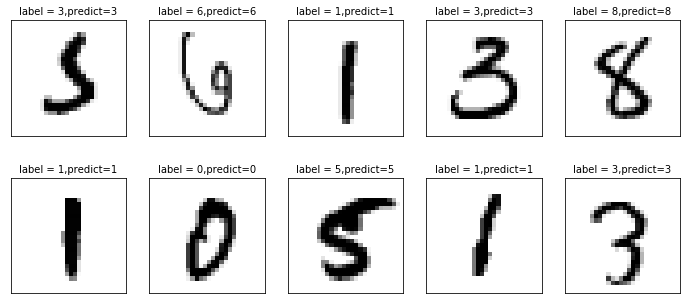

In [7]:
plot_images(X_test_images, y_test_labels, prediction, idx = 340)

# confusion matrix

In [8]:
pd.crosstab(y_test_labels, 
            prediction, 
           rownames = ["label"],
           colnames = ["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,0,1,0,1,3,1,1,0
1,0,1129,1,1,0,0,3,0,1,0
2,2,0,1021,0,1,0,1,5,1,1
3,0,0,5,996,0,1,0,4,2,2
4,2,2,4,0,956,0,4,0,0,14
5,2,0,0,14,0,864,4,1,4,3
6,3,3,0,1,1,2,948,0,0,0
7,1,7,10,1,0,0,0,1005,0,4
8,2,0,11,15,4,4,7,4,923,4


# use pandas search data

In [9]:
df = pd.DataFrame({"label":y_test_labels, "predict":prediction})
df

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [10]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
412,5,3
674,5,3
1003,5,3
1393,5,3
2035,5,3
2291,5,3
2597,5,3
2810,5,3
3902,5,3


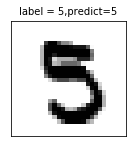

In [11]:
plot_images(X_test_images, y_test_labels,
           prediction,idx=5972,num=1)